<a href="https://colab.research.google.com/github/mandalasangeetha/NASSCOM_PROJECT/blob/main/NASSCOM_MEDICAL_INSURENCE_PREDICTION_USING_LINEAR_REGRESSION_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Loading Data






In [ ]:
import pandas as pd
Data=pd.read_csv("/content/drive/MyDrive/Nasscom_Project_Medical_Insurence.csv")

##Exploring Data

In [ ]:
Data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
Data.shape

(1338, 7)

In [ ]:
Data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
Data['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
Data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Data['sex'] = le.fit_transform(Data['sex'])
Data['smoker'] = le.fit_transform(Data['smoker'])
Data['region'] = le.fit_transform(Data['region'])

*italicized text*##Split Data

In [ ]:
X = Data.drop('charges',axis=1)
y = Data['charges']
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 39)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


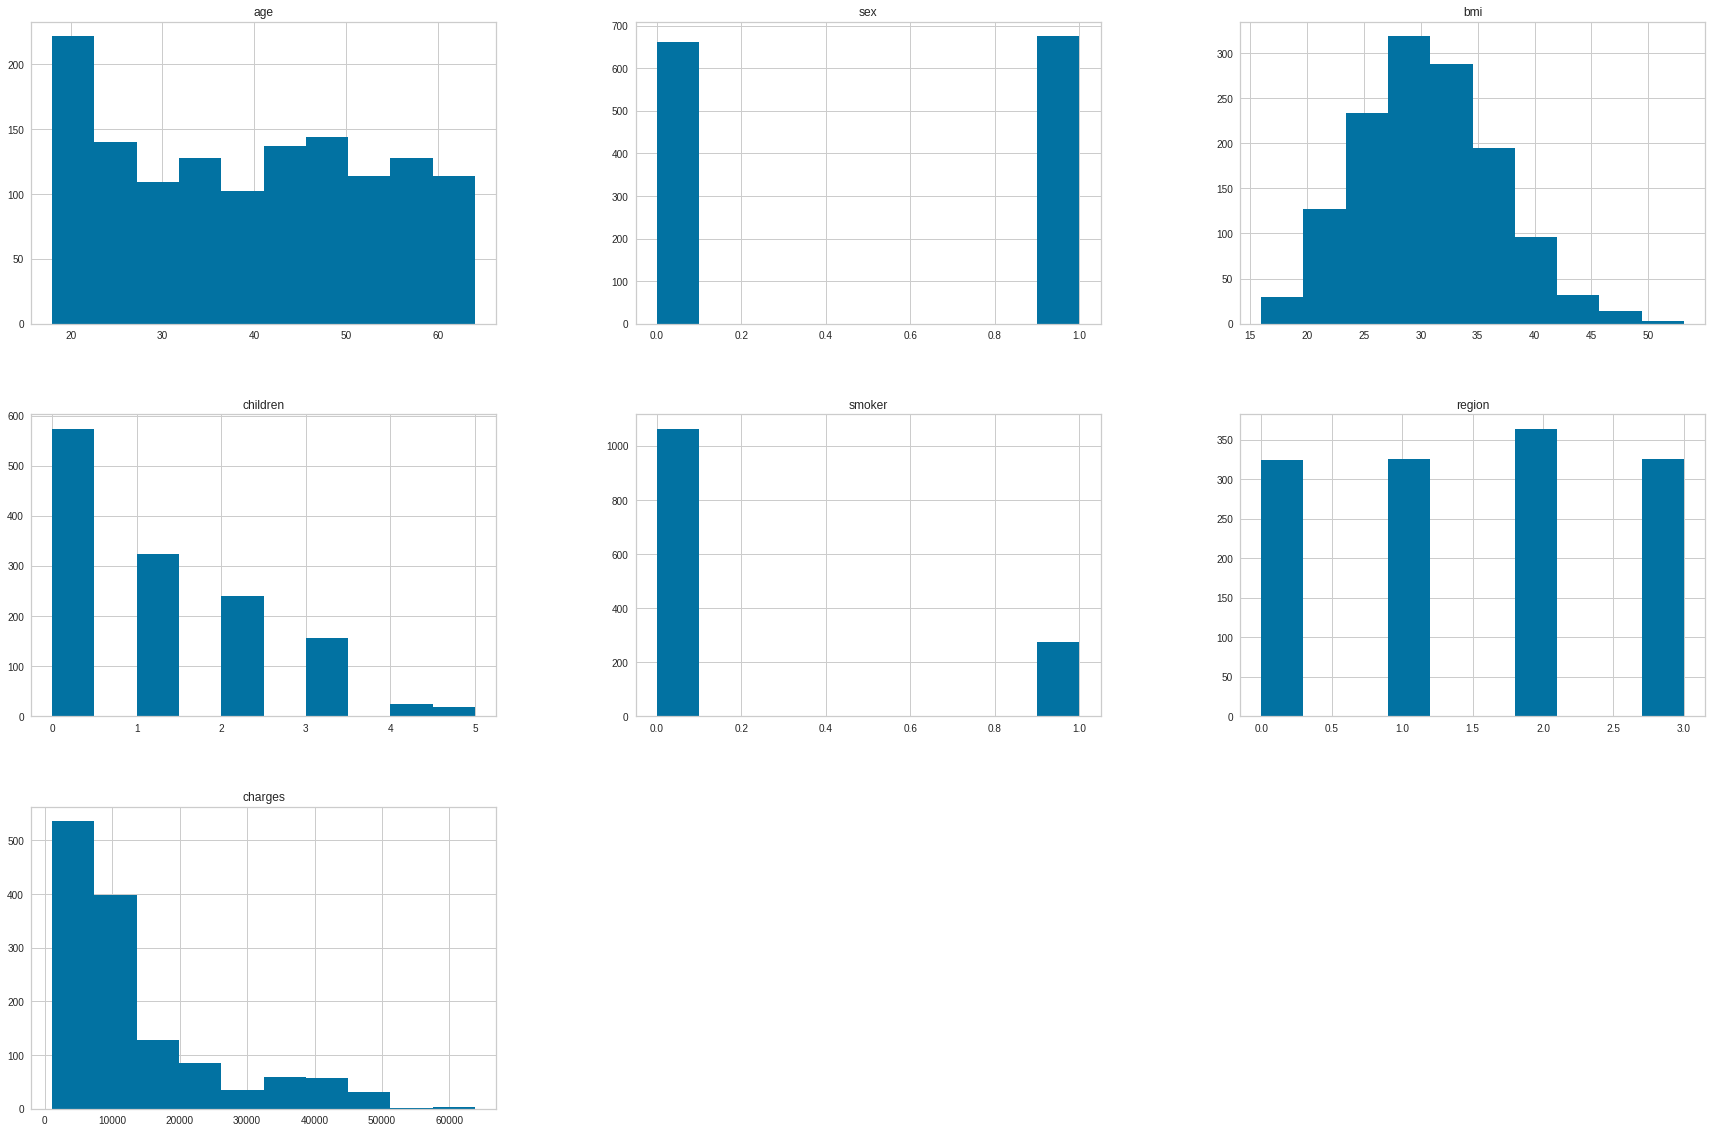

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt 
fig = plt.figure(figsize = (30,20))
ax = fig.gca()
Data.hist(ax=ax)
plt.show()

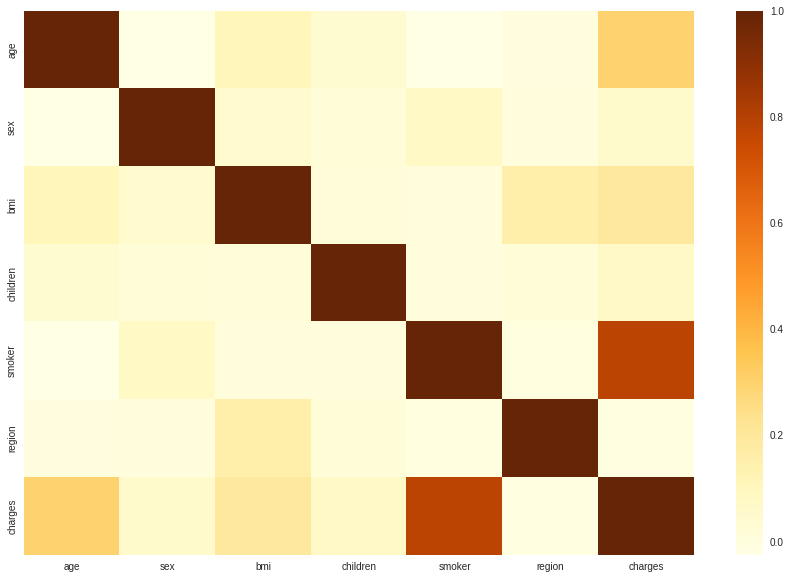

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(Data.corr(), cmap="YlOrBr")

In [ ]:
from yellowbrick.target import FeatureCorrelation

feature_names = list(X.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


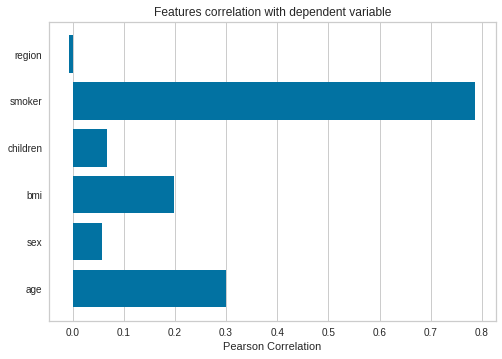

In [ ]:
visualizer = FeatureCorrelation(labels = feature_names)

visualizer.fit(X, y)

visualizer.poof()

##Show Outlier Data

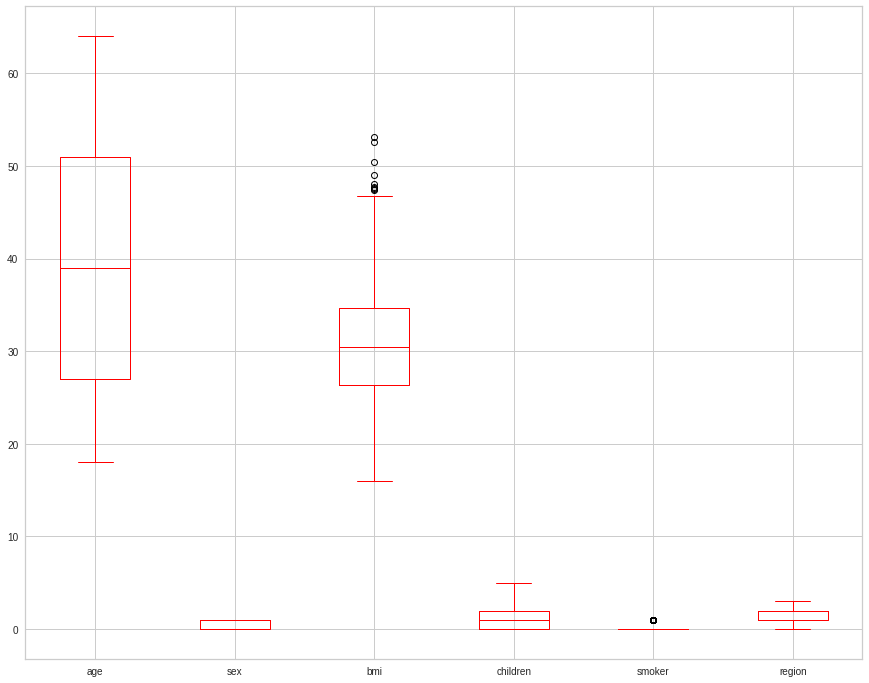

In [ ]:
boxplot = X.boxplot(figsize=(15, 12),color='red')

In [ ]:
Data.loc[Data['bmi'] > 45]  

,age,sex,bmi,children,smoker,region,charges
116,58,1,49.06,0,0,2,11381.32540
286,46,0,48.07,2,0,0,9432.92530
292,25,1,45.54,2,1,2,42112.23560
401,47,1,47.52,1,0,2,8083.91980
438,52,0,46.75,5,0,2,12592.53450
454,32,1,46.53,2,0,2,4686.38870
543,54,0,47.41,0,1,2,63770.42801
547,54,0,46.70,2,0,3,11538.42100
549,43,0,46.20,0,1,2,45863.20500
582,39,1,45.43,2,0,2,6356.27070


In [ ]:
mean_bmi = X['bmi'].mean()
mean_bmi

30.663396860986538

In [ ]:
for index, row in X.iterrows():
    
    if row['bmi']  >46:
        X.at[index, 'bmi'] = mean_bmi

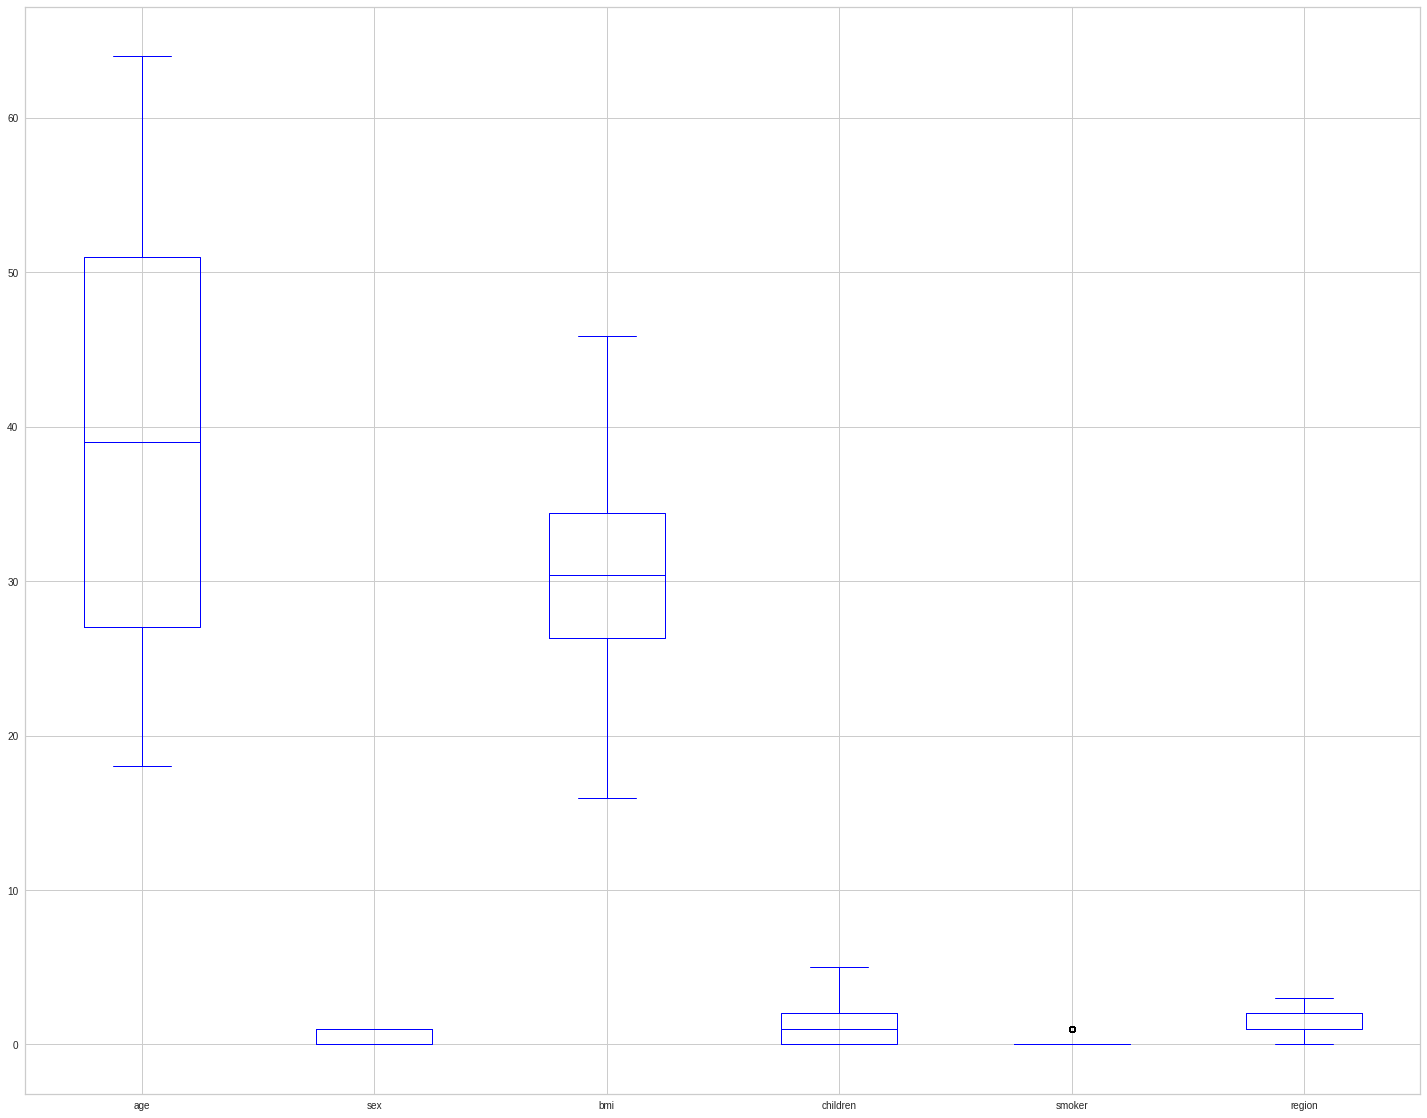

In [ ]:
boxplot = X.boxplot(figsize=(25, 20),color="blue")

##Model 1 -> LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
model_1 = make_pipeline(StandardScaler(), LinearRegression())

In [ ]:
model_1.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [ ]:
model_1_score=model_1.score(X_test,y_test)
model_1_score

0.7717098396766169

In [ ]:
from sklearn.metrics import mean_absolute_error
y_pred = model_1.predict(X_test)
mean_absolute_error(y_test, y_pred)

4002.6041737737814

###Extra Models For Predictions

Model 2-> Lasso

In [ ]:
from sklearn.linear_model import Lasso
model_2 = make_pipeline(StandardScaler(), Lasso())

In [ ]:
model_2.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lasso',
                 Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [ ]:
model_2.score(X_test,y_test)

0.771708465339527

In [ ]:
y_pred = model_2.predict(X_test)
mean_absolute_error(y_test, y_pred)

4002.490736961797

Model 3 -> RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_3 =make_pipeline(StandardScaler(), RandomForestRegressor()) 

In [ ]:
model_3.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [ ]:
model_3.score(X_test,y_test)

0.8497501026803991

In [ ]:
y_pred = model_3.predict(X_test)
mean_absolute_error(y_test, y_pred)

2695.745633906717